In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
amazon_data = pd.read_csv("Amazon Sales data.csv")

# Display first few rows
amazon_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# Convert date columns to datetime
amazon_data['Order Date'] = pd.to_datetime(amazon_data['Order Date'])
amazon_data['Ship Date'] = pd.to_datetime(amazon_data['Ship Date'])

# Check for missing values
print(amazon_data.isnull().sum())

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [4]:
# Calculate total revenue, cost, and profit
total_revenue = amazon_data['Total Revenue'].sum()
total_cost = amazon_data['Total Cost'].sum()
total_profit = amazon_data['Total Profit'].sum()

print(f"Total Revenue: {total_revenue}")
print(f"Total Cost: {total_cost}")
print(f"Total Profit: {total_profit}")

Total Revenue: 137348768.31
Total Cost: 93180569.91000001
Total Profit: 44168198.39999999


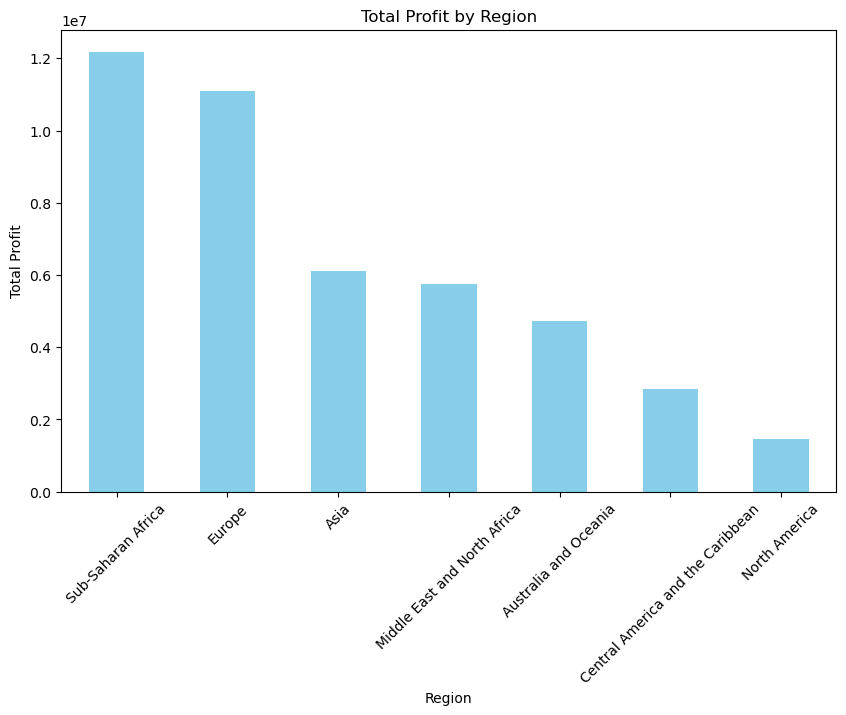

In [5]:
# Total profit by region
region_profit = amazon_data.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)

# Plot profit by region
plt.figure(figsize=(10, 6))
region_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

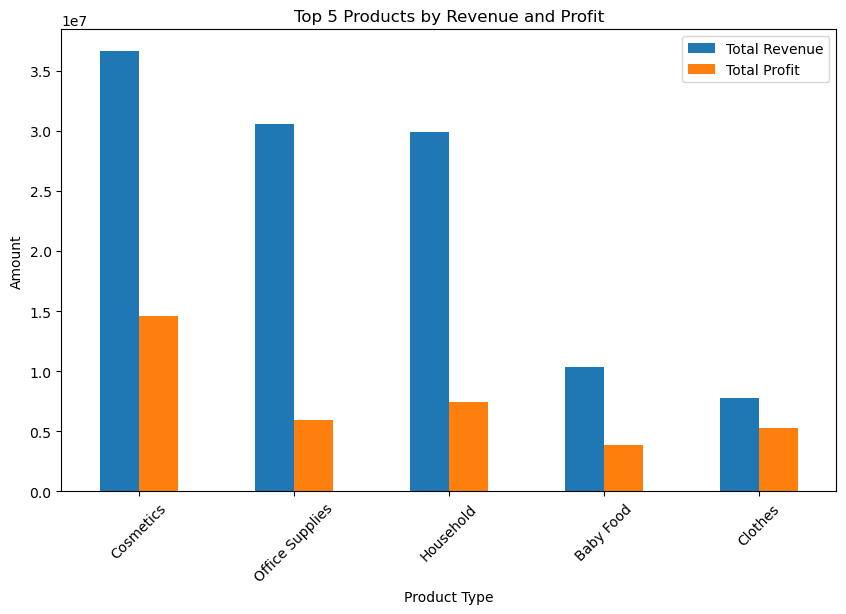

In [6]:
# Total revenue and profit by product type
product_performance = amazon_data.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum().sort_values(by='Total Revenue', ascending=False)

# Plot top 5 products by revenue
product_performance.head(5).plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Products by Revenue and Profit')
plt.xlabel('Product Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

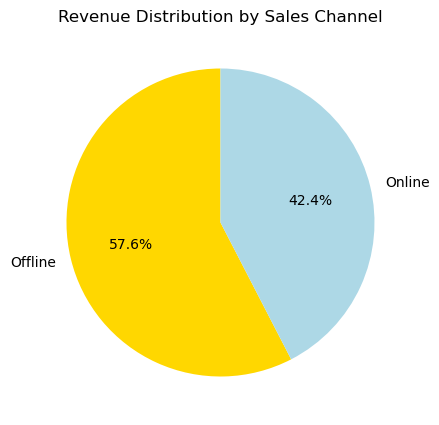

In [7]:
# Total revenue by sales channel
channel_revenue = amazon_data.groupby('Sales Channel')['Total Revenue'].sum()

# Plot sales channel performance
plt.figure(figsize=(8, 5))
channel_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('Revenue Distribution by Sales Channel')
plt.ylabel('')
plt.show()

C:\Users\mabas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mabas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


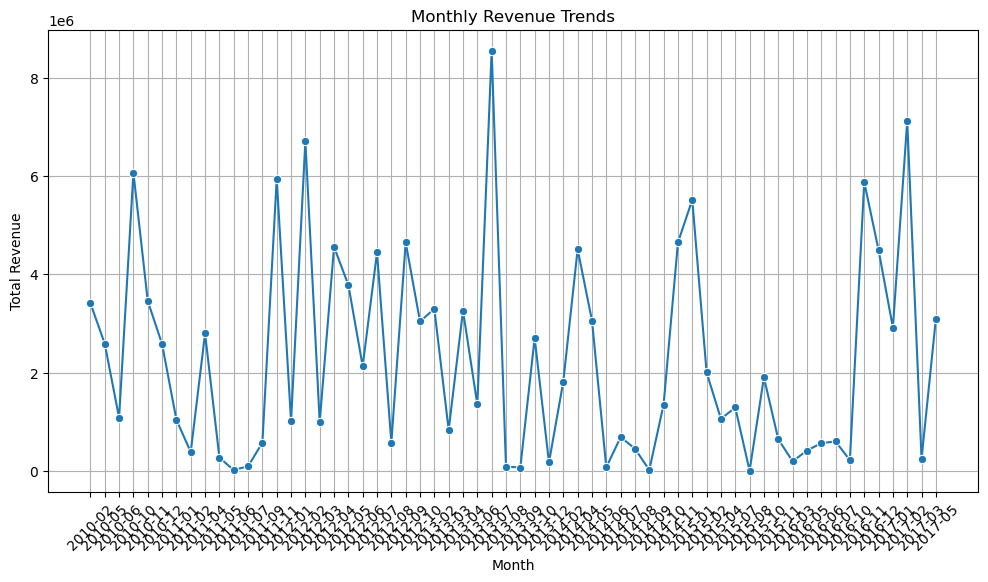

In [8]:
# Extract month and year
amazon_data['Month'] = amazon_data['Order Date'].dt.to_period('M')

# Monthly revenue
monthly_revenue = amazon_data.groupby('Month')['Total Revenue'].sum()

# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()